In [1]:
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion,Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [5]:
housing = pd.read_csv("housing.csv")

In [6]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


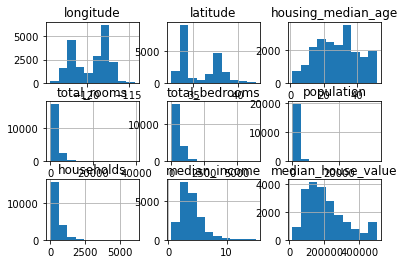

In [8]:
import matplotlib.pyplot as plt
housing.hist()

plt.show()

In [9]:
strat_train_data, strat_test_data = train_test_split(housing, test_size = 0.2, random_state= 42)

In [10]:
housing = strat_train_data.copy()

In [11]:
corr = housing.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

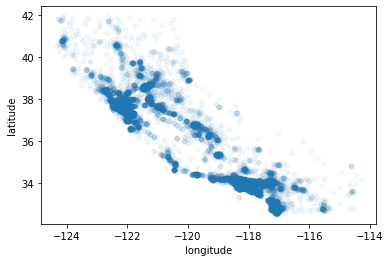

In [12]:
housing.plot(kind="scatter", x="longitude", y = "latitude", alpha=.05)

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

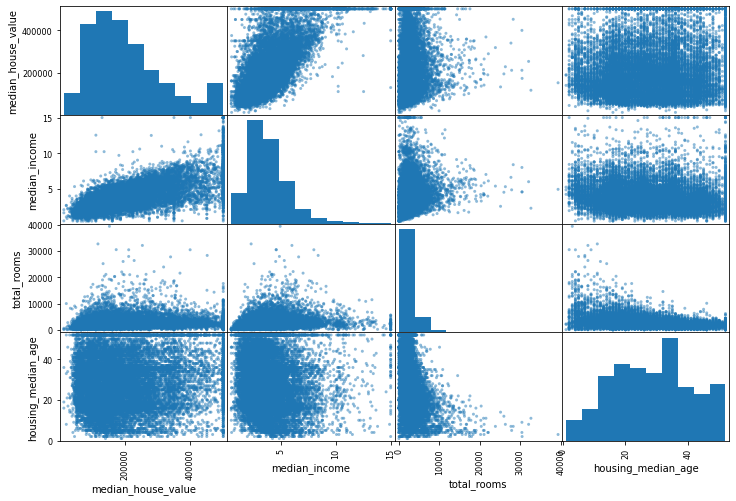

In [13]:
sct_features = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[sct_features],figsize=(12,8))

In [14]:
housing["room_per_household"] = housing["total_rooms"]/ housing["households"]
housing["bedroom_per_rooms"] = housing["total_bedrooms"]/ housing["total_rooms"]
housing["population_per_household"] = housing["population"]/ housing["households"]

In [15]:
corr = housing.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
room_per_household          0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedroom_per_rooms          -0.257419
Name: median_house_value, dtype: float64

Now we have added 3 more derive features and can see that bedroom_per_rooms is also contributing a promising feature.
So we got our data. Now we will create function for cleaing data, filling data, adding derived features and data transformation.

In [16]:
#first reset data to its original state
housing = strat_train_data.drop(["median_house_value"], axis= 1)
housing_label = strat_train_data["median_house_value"].copy()

In [17]:
#Create first Transformer FeatureSelector
#It will select numeric and categorical feature

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attr):
        self.attr = attr
    
    def fit(self, X, y= None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attr].values

In [18]:
#Create another Transformer  CustomFeatureAdder
total_rooms, total_bedrooms , population, household = 3, 4, 5, 6

class CustomFeatureAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_rooms):
        self.add_bedroom_per_rooms = add_bedroom_per_rooms
        
    def fit(self, X, y= None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:,total_rooms]/ X[:,household]
        population_per_household = X[:,population] / X[:,household]
        
        if self.add_bedroom_per_rooms:
            bedroom_per_rooms = X[:,total_bedrooms] / X[:,total_rooms]
            return np.c_[X,rooms_per_household, population_per_household, bedroom_per_rooms]
        else:
            return np.c_[X,rooms_per_household, population_per_household]

In [19]:
add_feature = CustomFeatureAdder(add_bedroom_per_rooms=True)
housing_with_customFeature = add_feature.transform(housing.values)
housingpd = pd.DataFrame(housing_with_customFeature, columns=list(housing.columns)+["rooms_per_household", "population_per_household","bedroom_per_rooms"],
    index=housing.index)
housingpd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedroom_per_rooms
14196,-117.03,32.71,33,3126,627,2300,623,3.2596,NEAR OCEAN,5.01766,3.69181,0.200576
8267,-118.16,33.77,49,3382,787,1314,756,3.8125,NEAR OCEAN,4.47354,1.7381,0.232703
17445,-120.48,34.66,4,1897,331,915,336,4.1563,NEAR OCEAN,5.64583,2.72321,0.174486
14265,-117.11,32.69,36,1421,367,1418,355,1.9425,NEAR OCEAN,4.00282,3.99437,0.258269
2271,-119.8,36.78,43,2382,431,874,380,3.5542,INLAND,6.26842,2.3,0.18094


Now Create Pipeline consisting of impuer, custom Transformer, Normalization of Standerdization
We will create two pipeline first with number and second with category

In [20]:
num_attr = list(housing.drop("ocean_proximity",axis= 1))
cat_attr = ["ocean_proximity"]

In [21]:
numerical_pipeline = Pipeline([
    ("selector", FeatureSelector(num_attr)),
    ("imputer", SimpleImputer(strategy="median")),
    ("add_feature", CustomFeatureAdder(add_bedroom_per_rooms=True)),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("selector", FeatureSelector(cat_attr)),
    ("endcoder", OneHotEncoder(sparse=False))
])

In [22]:
#Merege both feature into one with FeatureUnion

combined_pipeline = FeatureUnion(transformer_list= [
    ("num_p", numerical_pipeline),
    ("cat_p", categorical_pipeline)
])

In [23]:
housing_transformed = combined_pipeline.fit_transform(housing)
housing_transformed


array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
#Train and predict model
#LinearRegression
lr = LinearRegression()
lr.fit(housing_transformed,housing_label)
pred = lr.predict(housing_transformed)
mse = mean_squared_error(housing_label, pred)
rms = np.sqrt(mse)
rms

67593.20745775253